일별시세 페이지 분석

In [1]:
index_cd = 'KPI200'
page_n = 1
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [2]:
from urllib.request import urlopen  
source = urlopen(naver_index).read()
source

b'\n\n\n\n\n\n\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/common.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/layout.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/main.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock2.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/newstock3.css?20180425050205">\n<link rel="stylesheet" type="text/css" href="http://finance.naver.com/css/world.css?20180425050205">\n</head>\n<body>\n<script type="text/javascript" src="http://finance.naver.com/js/lcslog.js?2018042505020

In [3]:
import bs4
source = bs4.BeautifulSoup(source, 'lxml')

In [4]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="http://finance.naver.com/css/newstock.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/common.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/layout.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/main.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/newstock2.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/newstock3.css?20180425050205" rel="stylesheet" type="text/css"/>
  <link href="http://finance.naver.com/css/world.css?20180425050205" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <script src="http://finance.naver.com/js/lcslog.js?20180425050205" type="text/javascript">
  </script>
  <!-- 일별시세

In [5]:
td = source.find_all('td')
len(td)

54

날짜 추출

In [6]:
# /html/body/div/table[1]/tbody/tr[3]/td[1]
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]


<td class="date">2018.04.27</td>

In [7]:
d = source.find_all('td', class_='date')[0].text
d

'2018.04.27'

In [8]:
import datetime as dt

In [9]:
yyyy = int(d.split('.')[0]) 
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])

this_date= dt.date(yyyy, mm, dd)
this_date

datetime.date(2018, 4, 27)

날짜정보를  date 타입으로 변경하는 함수 정의

In [10]:
def date_format(d):
    d = str(d).replace('-', '.')
    
    yyyy = int(d.split('.')[0]) 
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])

    this_date= dt.date(yyyy, mm, dd)
    return this_date

종가 추출

In [11]:
# /html/body/div/table[1]/tbody/tr[3]/td[2]

In [12]:
this_close = source.find_all('tr')[2].find_all('td')[1].text
this_close = this_close.replace(',', '')
this_close = float(this_close)
this_close

320.8

In [13]:
p = source.find_all('td', class_='number_1')[0].text
p

'320.80'

페이지 상의 날짜와 종가정보 전체 추출

In [14]:
dates = source.find_all('td', class_='date')
prices = source.find_all('td', class_='number_1')

In [15]:
len(dates)

6

In [16]:
len(prices)

24

In [17]:
for n in range(len(dates)):
    this_date = dates[n].text
    this_date = date_format(this_date)
    
    this_close = prices[n*4].text   
    # 0, 4, 8, ... 4의 배수로 돌아가는 가격 추출
    this_close = this_close.replace(',', '')
    this_close = float(this_close)
    this_close
    
    print(this_date, this_close)

2018-04-27 320.8
2018-04-26 318.08
2018-04-25 313.99
2018-04-24 315.86
2018-04-23 317.89
2018-04-20 317.89


마지막 페이지 번호 찾기

In [18]:
# /html/body/div/table[2]/tbody/tr/td[7]/a

In [19]:
paging = source.find('td', class_='pgRR').find('a')['href']
paging

'/sise/sise_index_day.nhn?code=KPI200&page=509'

In [20]:
paging = paging.split('&')[1]
paging

'page=509'

In [21]:
paging = paging.split('=')[1]
paging

'509'

In [22]:
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(505)

source = urlopen(naver_index).read()
source = bs4.BeautifulSoup(source, 'lxml')

if source.find('td', class_='pgRR'):
    last_page = source.find('td', class_='pgRR').find('a')['href']
    last_page = last_page.split('&')[1]
    last_page = last_page.split('=')[1]
    last_page = int(last_page)

In [23]:
def historical_index_naver(index_cd, page_n=1, last_page=0):   
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            # 종가 처리
            this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
            this_close = this_close.replace(',', '')
            this_close = float(this_close)

            # 딕셔너리에 저장
            historical_prices[this_date] = this_close
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

네이버에서 일자별 인덱스를 추출하는 함수 정의

In [24]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:   
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료
                return historical_prices              
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

In [25]:
index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2018-4-1', '2018-4-4')
historical_prices

{datetime.date(2018, 4, 2): 314.0,
 datetime.date(2018, 4, 3): 313.38,
 datetime.date(2018, 4, 4): 308.54}

# 다음에서 해외지수 추출

In [26]:
url = 'http://finance.daum.net/global/index_daily.daum?type=default&ric=/.GSPC&page=1' 
    
source = urlopen(url).read()
source = bs4.BeautifulSoup(source, 'lxml')

In [27]:
dates = source.find_all('td', class_='datetime')
dates

[<td class="datetime">2018.04.27</td>,
 <td class="datetime">2018.04.26</td>,
 <td class="datetime">2018.04.25</td>,
 <td class="datetime">2018.04.24</td>,
 <td class="datetime">2018.04.23</td>,
 <td class="datetime">2018.04.20</td>,
 <td class="datetime">2018.04.19</td>,
 <td class="datetime">2018.04.18</td>,
 <td class="datetime">2018.04.17</td>,
 <td class="datetime">2018.04.16</td>]

In [28]:
prices = source.find_all('td', class_='num')
print(len(dates))
print(len(prices))

10
30


In [29]:
prices[0].text

'    \n\t\t    \t     \t     \t         \t\t\t            \t            \t            \t\t\t\t\t\t\t\t\t            \t\t\t\t\t\t\t2,669.91'

In [30]:
def historical_global_daum(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:  
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
    
    url = 'http://finance.daum.net/global/index_daily.daum?type=default&ric=/.' + index_cd + '&page=' + str(page_n)

    source = urlopen(url).read()
    source = bs4.BeautifulSoup(source, 'lxml')

    dates = source.find_all('td', class_='datetime')   # <td class="datetime">태그에서 날짜 수집
    prices = source.find_all('td', class_='num')   # <td class="num">태그에서 날짜 수집

    rows_in_page = len(dates)

    if len(dates) > 0:

        for n in range(rows_in_page):

            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)

            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*3].text
                this_close = this_close.replace(' ', '')
                this_close = this_close.replace('\t', '')
                this_close = this_close.replace('\n', '')
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료
                return historical_prices                         
        # 페이지 네비게이션
        if rows_in_page == 10:
            page_n = int(page_n)
            page_n = page_n + 1
            
            historical_global_daum(index_cd, start_date, end_date, page_n, last_page)
            
    return historical_prices  

In [31]:
historical_prices = dict()
daum = historical_global_daum('GSPC', '2018-4-1', '2018-4-5')
daum

{datetime.date(2018, 4, 2): 2581.88,
 datetime.date(2018, 4, 3): 2614.45,
 datetime.date(2018, 4, 4): 2644.69,
 datetime.date(2018, 4, 5): 2662.84}

# 만들어둔 함수를 이용해 KOSPI200과 S&P500 지수 추출

In [32]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2017-1-1', '2017-12-31')

In [33]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2017-1-1', '2017-12-31')

In [34]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [35]:
import pandas as pd

In [36]:
df = pd.DataFrame(tmp)
df

,KOSPI200,S&P500
2017-01-02,260.36,NaN
2017-01-03,262.97,2257.83
2017-01-04,263.12,2270.75
2017-01-05,261.98,2269.00
2017-01-06,263.20,2276.98
2017-01-09,263.74,2268.90
2017-01-10,263.73,2268.90
2017-01-11,268.15,2275.32
2017-01-12,269.95,2270.44
2017-01-13,267.91,2274.64


In [37]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,KOSPI200,S&P500
2017-01-02,260.36,2257.83
2017-01-03,262.97,2257.83
2017-01-04,263.12,2270.75
2017-01-05,261.98,2269.00
2017-01-06,263.20,2276.98
2017-01-09,263.74,2268.90
2017-01-10,263.73,2268.90
2017-01-11,268.15,2275.32
2017-01-12,269.95,2270.44
2017-01-13,267.91,2274.64


In [38]:
df.head()

,KOSPI200,S&P500
2017-01-02,260.36,2257.83
2017-01-03,262.97,2257.83
2017-01-04,263.12,2270.75
2017-01-05,261.98,2269.00
2017-01-06,263.20,2276.98


In [39]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-1', '2017-12-31')

In [40]:
index_cd = 'GSPC'
historical_prices = dict()
sp500 = historical_global_daum(index_cd, '2008-1-1', '2017-12-31')

In [41]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [42]:
df = pd.DataFrame(tmp)
df

,KOSPI200,S&P500
2008-01-02,235.30,1447.16
2008-01-03,234.67,1447.16
2008-01-04,235.77,1411.63
2008-01-07,231.00,1416.18
2008-01-08,230.34,1390.19
2008-01-09,232.53,1409.13
2008-01-10,229.47,1420.33
2008-01-11,224.41,1401.02
2008-01-14,222.81,1416.25
2008-01-15,220.91,1380.95


In [43]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,KOSPI200,S&P500
2008-01-02,235.30,1447.16
2008-01-03,234.67,1447.16
2008-01-04,235.77,1411.63
2008-01-07,231.00,1416.18
2008-01-08,230.34,1390.19
2008-01-09,232.53,1409.13
2008-01-10,229.47,1420.33
2008-01-11,224.41,1401.02
2008-01-14,222.81,1416.25
2008-01-15,220.91,1380.95


# matplotlib를 이용해 그래프 그리기

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

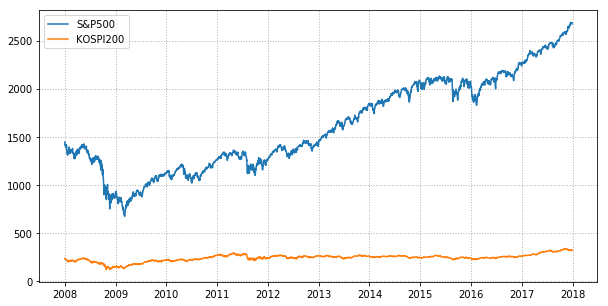

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'])
plt.plot(df['KOSPI200'])
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [46]:
df.iloc[0]

KOSPI200     235.30
S&P500      1447.16
Name: 2008-01-02, dtype: float64

In [47]:
df.loc[dt.date(2008, 1, 2)]

KOSPI200     235.30
S&P500      1447.16
Name: 2008-01-02, dtype: float64

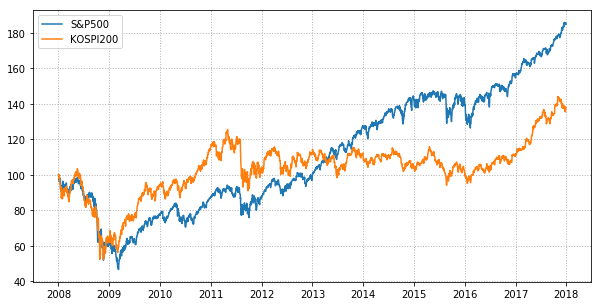

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2008, 1, 2)] * 100)
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2008, 1, 2)] * 100)
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [49]:
df_ratio_2016_now = df.loc[dt.date(2016, 1, 1):] / df.loc[dt.date(2016, 1, 4)] * 100
df_ratio_2016_now.head(3)

,KOSPI200,S&P500
2016-01-04,100.000000,100.000000
2016-01-05,100.639304,100.201226
2016-01-06,99.987214,98.887045


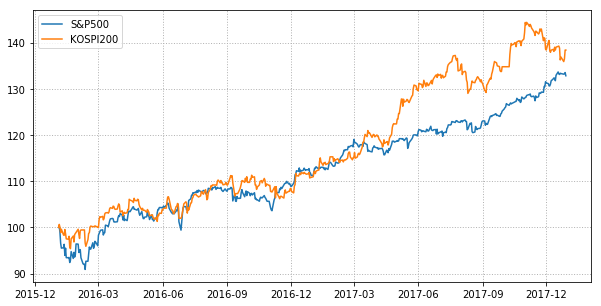

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(df_ratio_2016_now['S&P500'])
plt.plot(df_ratio_2016_now['KOSPI200'])
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

Text(0,0.5,'KOSPI200')

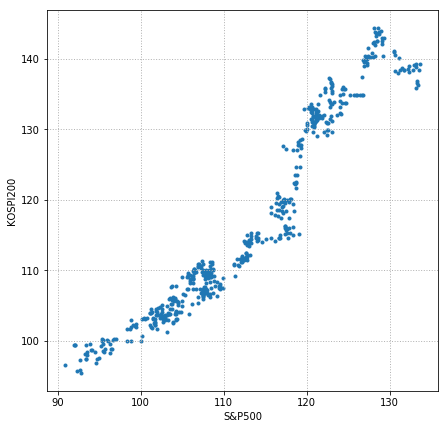

In [51]:
plt.figure(figsize=(7,7))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker='.')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2016_now['S&P500']
y = df_ratio_2016_now['KOSPI200']

# 1개 컬럼 np.array로 변환
independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

# Linear Regression
regr = LinearRegression()
regr.fit(independent_var, dependent_var)

result = {'Slope':regr.coef_[0,0], 'Intercept':regr.intercept_[0], 'R^2':regr.score(independent_var, dependent_var) }
result

{'Intercept': -28.225702646637544,
 'R^2': 0.92106597197974793,
 'Slope': 1.2880889473807509}

Text(0,0.5,'KOSPI200')

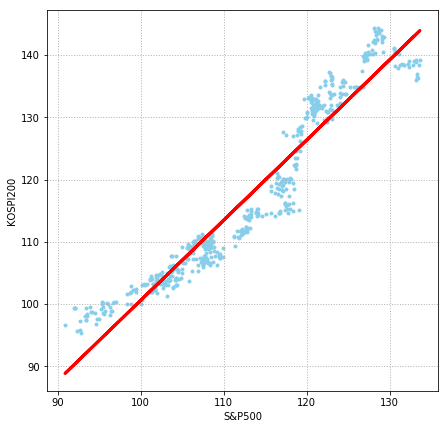

In [53]:
plt.figure(figsize=(7,7))
plt.scatter(independent_var, dependent_var, marker='.', color='skyblue')
plt.plot(independent_var, regr.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')